In [51]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [53]:
%%R

require('tidyverse')
require('DescTools')

In [54]:
df = pd.read_csv('grants_merged_plants_eji.csv')
df.head()

,Unnamed: 0.2,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,...,State_y,Assistance Listing,Program,Investment Category,Website Url,Announcement Url,Data Extract Date,STATE_y,COUNTY,TRACT_y
0,0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,11503,140000US01003011503,1003011503,1003011503,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,3,11604,140000US01003011604,1003011604,1003011604,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,950100,140000US01005950100,1005950100,1005950100,Barbour County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.shape

(90906, 222)

In [56]:
df['plant_name'].nunique()

9230

In [57]:
df[df['StateDesc'] == 'Maryland'].size

351204

In [58]:
md = df[df['StateDesc'] == 'Maryland']

In [59]:
md.to_csv('md.csv')

In [60]:
%%R
 
# Import data with R
df <- read_csv('md.csv', show_col_types = FALSE)
df

New names:
• `` -> `...1`
# A tibble: 1,582 × 223
    ...1 `Unnamed: 0.2` STATEFP COUNTYFP TRACTCE AFFGEOID       GEOID GEOID_2020
   <dbl>          <dbl>   <dbl>    <dbl>   <dbl> <chr>          <dbl>      <dbl>
 1 24209          24209      24        3  702602 140000US240… 2.40e10    2.40e10
 2 24210          24210      24        3  706700 140000US240… 2.40e10    2.40e10
 3 24211          24211      24        3  730205 140000US240… 2.40e10    2.40e10
 4 24212          24212      24        3  730509 140000US240… 2.40e10    2.40e10
 5 24852          24852      24        3  731205 140000US240… 2.40e10    2.40e10
 6 24853          24853      24        3  731209 140000US240… 2.40e10    2.40e10
 7 24854          24854      24        3  740703 140000US240… 2.40e10    2.40e10
 8 27478          27478      24       21  750801 140000US240… 2.40e10    2.40e10
 9 27479          27479      24       21  751002 140000US240… 2.40e10    2.40e10
10 27480          27480      24       21  752201 140000US24

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 24 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`). 



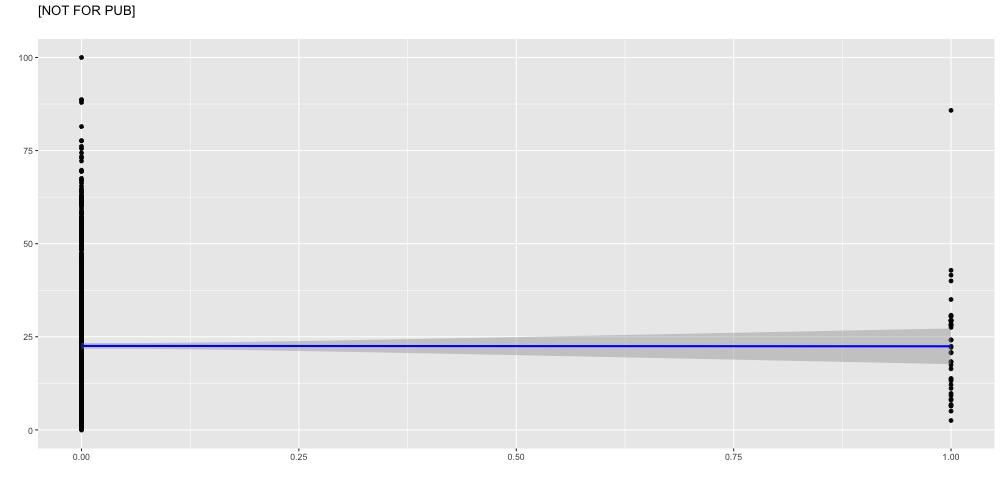

In [61]:
%%R -w 1000

ggplot(df) +
    aes(x=fossil_fuels, y=E_POV200) +
    geom_point() +
    geom_smooth(method="lm", se=TRUE, color="blue") +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`). 



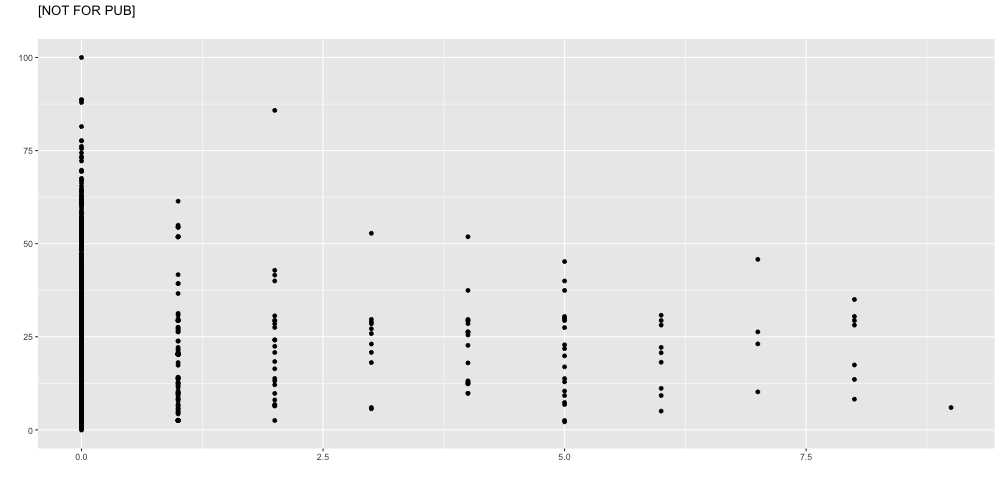

In [62]:
%%R -w 1000

ggplot(df) +
    aes(x=Category_Number, y=E_POV200) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


In [63]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_UNINSUR = median(E_UNINSUR, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_UNINSUR
             <dbl>            <dbl>
 1               0             4.2 
 2               1             2.5 
 3               2             3.55
 4               3             4.9 
 5               4             4.2 
 6               5             4.25
 7               6             4.3 
 8               7             5.6 
 9               8             3.3 
10               9             1.5 


### Highest is in 'biomass' - does this include the Wheelabrator in Baltimore? 

In [64]:
%%R

library(dplyr)

df %>%
  group_by(`Primary Technology`) %>%
  summarise(median_E_UNINSUR = median(E_UNINSUR, na.rm = TRUE)) %>%
  arrange(desc(median_E_UNINSUR))

# A tibble: 18 × 2
   `Primary Technology`                   median_E_UNINSUR
   <chr>                                             <dbl>
 1 Batteries                                          9.45
 2 All Other                                          6.4 
 3 Landfill Gas                                       5.6 
 4 Onshore Wind Turbine                               4.9 
 5 Natural Gas Internal Combustion Engine             4.4 
 6 Other Natural Gas                                  4.3 
 7 Petroleum Liquids                                  4.3 
 8 Conventional Hydroelectric                         4.2 
 9 <NA>                                               4.2 
10 Natural Gas Steam Turbine                          3.5 
11 Conventional Steam Coal                            3.3 
12 Natural Gas Fired Combustion Turbine               3.3 
13 Multiple                                           3.2 
14 Natural Gas Fired Combined Cycle                   2.9 
15 Geothermal                        

### Maryland's batteries project (AES Warrior Run Energy Storage Project) is located at the site of a decommissioned coal plant 

In [65]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_AFAM = median(E_AFAM, na.rm = TRUE)) %>%
  arrange(desc(median_AFAM))

# A tibble: 10 × 2
   Category_Number median_AFAM
             <dbl>       <dbl>
 1               0       19.4 
 2               7       16.2 
 3               3       15.5 
 4               2       14.4 
 5               8       13.1 
 6               4       12.7 
 7               1       12.1 
 8               5        9.25
 9               9        8.7 
10               6        4.7 


In [66]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_POV200 = median(E_POV200, na.rm = TRUE)) %>%
  arrange(desc(median_E_POV200))

# A tibble: 10 × 2
   Category_Number median_E_POV200
             <dbl>           <dbl>
 1               8           28.1 
 2               3           25.9 
 3               4           25.5 
 4               7           24.7 
 5               2           21.6 
 6               5           20.9 
 7               6           20.7 
 8               1           20.3 
 9               0           19.3 
10               9            6.00


### The poorest communities are located near coal plants in MD

In [67]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_CANCER = median(E_CANCER, na.rm = TRUE)) %>%
  arrange(desc(median_E_CANCER))

# A tibble: 10 × 2
   Category_Number median_E_CANCER
             <dbl>           <dbl>
 1               8           10.2 
 2               1            9.4 
 3               6            9.2 
 4               5            9.1 
 5               2            8.3 
 6               4            8.3 
 7               3            7.8 
 8               0            7.1 
 9               7            6.55
10               9            5.6 


### MD tracts around fossil fuel powerplants all have higher rates of cancer than tracts without powerplants. Tracts with solar also have higher rates of cancer than without solar

In [68]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(mean_E_IMPWTR = mean(E_IMPWTR, na.rm = TRUE)) %>%
  arrange(desc(mean_E_IMPWTR))

# A tibble: 10 × 2
   Category_Number mean_E_IMPWTR
             <dbl>         <dbl>
 1               9         0.981
 2               7         0.952
 3               0         0.931
 4               3         0.884
 5               4         0.861
 6               1         0.855
 7               5         0.835
 8               2         0.809
 9               8         0.761
10               6         0.579


In [69]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_ASTHMA = median(E_ASTHMA, na.rm = TRUE)) %>%
  arrange(desc(median_ASTHMA))

# A tibble: 10 × 2
   Category_Number median_ASTHMA
             <dbl>         <dbl>
 1               5          11.4
 2               2          11.3
 3               4          11.3
 4               3          11.1
 5               1          11  
 6               6          11  
 7               8          11  
 8               0          10.9
 9               7          10.1
10               9           8.2


In [70]:
%%R

df %>%
  group_by(`Primary Technology`) %>%
  summarise(median_ASTHMA = median(E_ASTHMA, na.rm = TRUE)) %>%
  arrange(desc(median_ASTHMA))

# A tibble: 18 × 2
   `Primary Technology`                   median_ASTHMA
   <chr>                                          <dbl>
 1 Other Natural Gas                               12.9
 2 Multiple                                        11.7
 3 All Other                                       11.4
 4 Batteries                                       11.4
 5 Natural Gas Fired Combined Cycle                11.4
 6 Natural Gas Fired Combustion Turbine            11.4
 7 Conventional Hydroelectric                      11.3
 8 Onshore Wind Turbine                            11.1
 9 Conventional Steam Coal                         11  
10 Petroleum Liquids                               11  
11 Solar Photovoltaic                              11  
12 --                                              10.9
13 <NA>                                            10.9
14 Natural Gas Internal Combustion Engine          10.5
15 Natural Gas Steam Turbine                       10.3
16 Landfill Gas              

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`). 



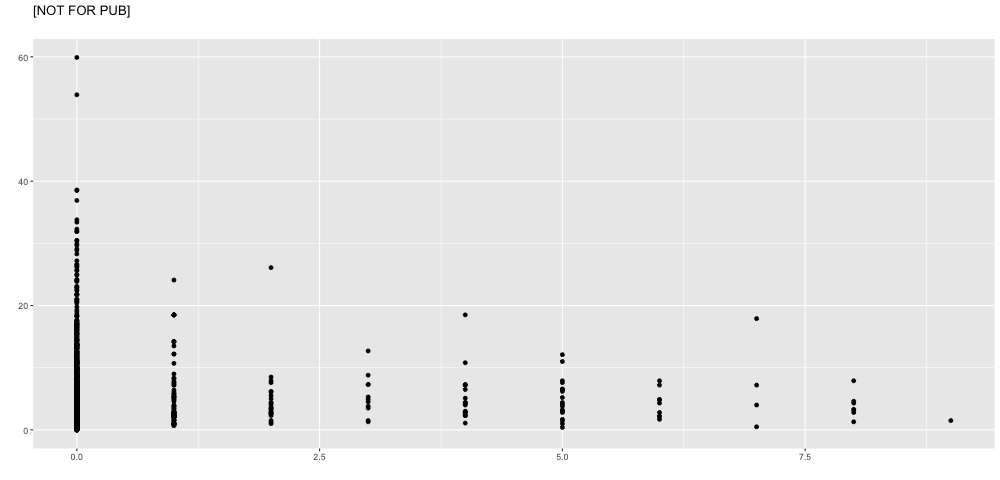

In [71]:
%%R -w 1000

ggplot(df) +
    aes(x=`Category_Number`, y=E_UNINSUR) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


In [72]:
%%R -i df
model <- lm(E_CANCER ~ factor(Category_Number), data=df)
summary(model)


Call:
lm(formula = E_CANCER ~ factor(Category_Number), data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.262 -2.000  0.100  1.700 19.600 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              7.900000   0.009497 831.807  < 2e-16 ***
factor(Category_Number)1 0.900601   0.041537  21.682  < 2e-16 ***
factor(Category_Number)2 1.062300   0.074035  14.349  < 2e-16 ***
factor(Category_Number)3 0.961598   0.083602  11.502  < 2e-16 ***
factor(Category_Number)4 1.089152   0.080887  13.465  < 2e-16 ***
factor(Category_Number)5 1.024846   0.079403  12.907  < 2e-16 ***
factor(Category_Number)6 0.758615   0.112529   6.741 1.58e-11 ***
factor(Category_Number)7 0.830026   0.136278   6.091 1.13e-09 ***
factor(Category_Number)8 1.466917   0.230892   6.353 2.12e-10 ***
factor(Category_Number)9 1.002326   0.405837   2.470   0.0135 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.661 on 88490 

In [89]:
%%R -i df
model <- lm(E_CANCER ~ factor(Category_Number) + E_POV200, data=df)
summary(model)


Call:
lm(formula = E_CANCER ~ factor(Category_Number), data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.262 -2.000  0.100  1.700 19.600 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              7.900000   0.009497 831.807  < 2e-16 ***
factor(Category_Number)1 0.900601   0.041537  21.682  < 2e-16 ***
factor(Category_Number)2 1.062300   0.074035  14.349  < 2e-16 ***
factor(Category_Number)3 0.961598   0.083602  11.502  < 2e-16 ***
factor(Category_Number)4 1.089152   0.080887  13.465  < 2e-16 ***
factor(Category_Number)5 1.024846   0.079403  12.907  < 2e-16 ***
factor(Category_Number)6 0.758615   0.112529   6.741 1.58e-11 ***
factor(Category_Number)7 0.830026   0.136278   6.091 1.13e-09 ***
factor(Category_Number)8 1.466917   0.230892   6.353 2.12e-10 ***
factor(Category_Number)9 1.002326   0.405837   2.470   0.0135 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.661 on 88490 

In [101]:
%%R

# colnames(df)

NULL


### After controlling for poverty, cancer has a statistically significant relationship with existence of powerplants, especially coal

In [95]:
%%R

require('ggpubr')

Loading required package: ggpubr


In [102]:
%%R 

df_long <- df %>%
  pivot_longer(cols = c(E_TOTPOP, E_MINRTY, E_POV200, E_NOHSDP, E_UNEMP, E_RENTER, E_UNINSUR, E_NOINT, E_AGE17, E_DISABL, E_LIMENG, E_GROUPQ, E_OZONE, E_PM, E_DSLPM, E_TOTCR, E_TRI, E_TSD, E_COAL, E_LEAD, E_HOUAGE, E_ROAD, E_IMPWTR, E_CHD, E_CANCER, E_DIABETES, E_MHLTH, E_NEHD, E_SMOKE, E_DRGT, E_RFLD, E_AFAM, E_HISP),  # Replace with real column names
               names_to = "variable", 
               values_to = "value")


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 80909 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 80909 rows containing non-finite outside the scale range
(`stat_cor()`). 

R[write to console]: 3: Removed 80909 rows containing missing values or values outside the scale range
(`geom_point()`). 



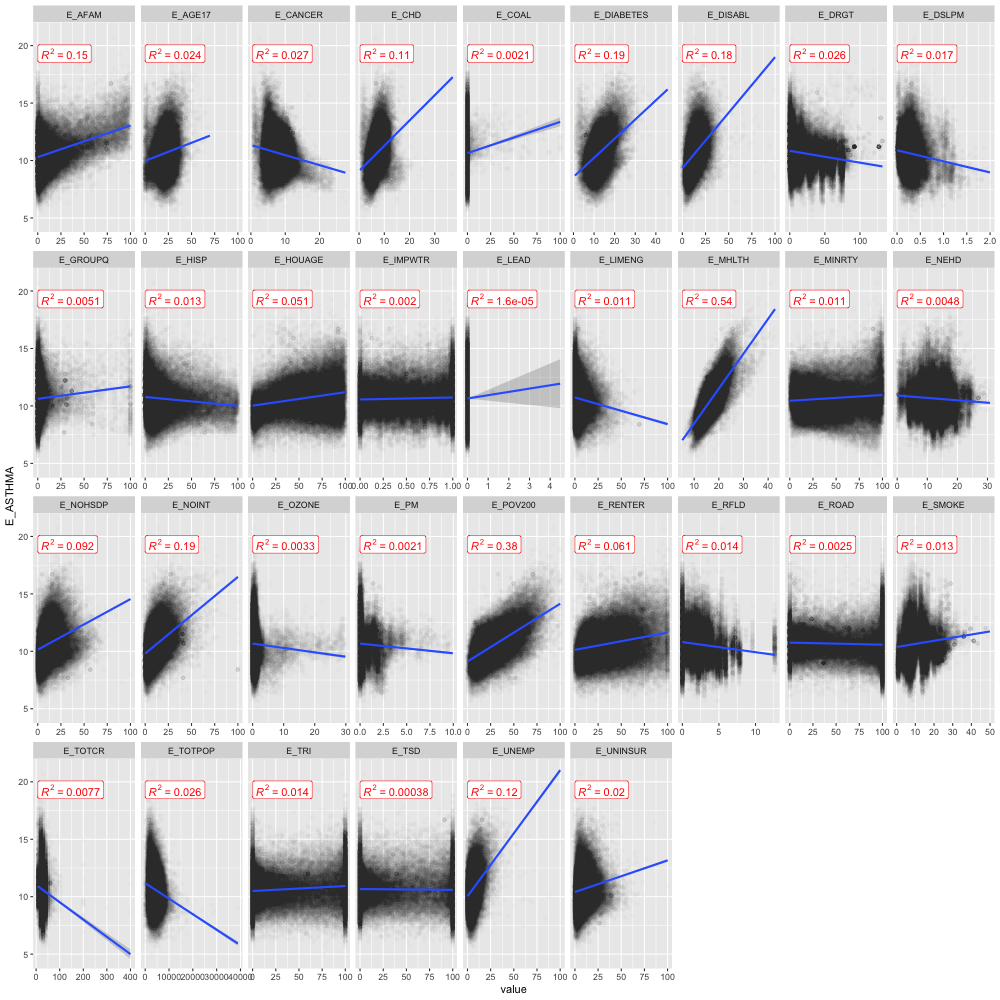

In [104]:
%%R -w 1000 -h 1000


ggplot(df_long, aes(x=value, y=E_ASTHMA)) +
    geom_point(alpha=.01) +
    facet_wrap(~variable, scales='free_x',nrow=4) +
    geom_smooth(method="lm") +
    stat_cor(aes(label = after_stat(rr.label)), color = "red", geom = "label")


In [25]:
%%R -i df
model <- lm(E_ASTHMA ~ factor(Category_Number), data=df)
summary(model)


Call:
lm(formula = E_ASTHMA ~ factor(Category_Number), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6238 -0.9238 -0.1238  0.8146 10.0762 

Coefficients:
                          Estimate Std. Error  t value Pr(>|t|)    
(Intercept)              10.623835   0.005123 2073.554  < 2e-16 ***
factor(Category_Number)1  0.171361   0.022408    7.647 2.07e-14 ***
factor(Category_Number)2  0.169311   0.039939    4.239 2.25e-05 ***
factor(Category_Number)3  0.261545   0.045100    5.799 6.68e-09 ***
factor(Category_Number)4  0.176986   0.043636    4.056 5.00e-05 ***
factor(Category_Number)5  0.223136   0.042835    5.209 1.90e-07 ***
factor(Category_Number)6  0.108847   0.060705    1.793  0.07297 .  
factor(Category_Number)7  0.228646   0.073517    3.110  0.00187 ** 
factor(Category_Number)8  0.350601   0.124558    2.815  0.00488 ** 
factor(Category_Number)9  0.120351   0.218934    0.550  0.58252    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

In [105]:
%%R -i df
model <- lm(E_ASTHMA ~ E_POV200, data=df)
summary(model)


Call:
lm(formula = E_ASTHMA ~ E_POV200, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8448 -0.7117 -0.0117  0.7007  6.9070 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.1125034  0.0076424  1192.4   <2e-16 ***
E_POV200    0.0503230  0.0002174   231.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.132 on 88293 degrees of freedom
  (2611 observations deleted due to missingness)
Multiple R-squared:  0.3777,	Adjusted R-squared:  0.3777 
F-statistic: 5.359e+04 on 1 and 88293 DF,  p-value: < 2.2e-16



### After controlling for poverty, the presence of most power plants is still statistically significant with asthma rates. Especially in 7 - Biomass

In [27]:
%%R -i df
model <- lm(E_UNINSUR ~ factor(Category_Number) + E_POV200, data=df)
summary(model)


Call:
lm(formula = E_UNINSUR ~ factor(Category_Number) + E_POV200, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.211  -3.694  -1.282   2.590  97.468 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.532308   0.044594  56.786  < 2e-16 ***
factor(Category_Number)1 -0.463118   0.101548  -4.561 5.11e-06 ***
factor(Category_Number)2 -0.078874   0.180940  -0.436  0.66290    
factor(Category_Number)3 -0.355176   0.204114  -1.740  0.08185 .  
factor(Category_Number)4 -0.320917   0.197766  -1.623  0.10465    
factor(Category_Number)5 -0.396277   0.194049  -2.042  0.04114 *  
factor(Category_Number)6 -0.224886   0.275736  -0.816  0.41474    
factor(Category_Number)7 -0.132876   0.333047  -0.399  0.68992    
factor(Category_Number)8 -1.782831   0.564283  -3.159  0.00158 ** 
factor(Category_Number)9  0.538065   0.991815   0.543  0.58747    
E_POV200                  0.206784   0.001245 166.102  < 2e-16 ***
---

### After controlling for poverty, the presence of solar, coal, and 'other' powerplants is stat. significant with uninsurance rates

In [28]:
%%R -i df
model <- lm(E_UNINSUR ~ factor(Category_Number) + E_POV200 + E_AFAM, data=df)
summary(model)


Call:
lm(formula = E_UNINSUR ~ factor(Category_Number) + E_POV200 + 
    E_AFAM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.824  -3.703  -1.278   2.596  97.474 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.526000   0.044562  56.686  < 2e-16 ***
factor(Category_Number)1 -0.521776   0.101588  -5.136 2.81e-07 ***
factor(Category_Number)2 -0.139773   0.180870  -0.773 0.439654    
factor(Category_Number)3 -0.418616   0.204023  -2.052 0.040192 *  
factor(Category_Number)4 -0.394438   0.197707  -1.995 0.046040 *  
factor(Category_Number)5 -0.465395   0.193983  -2.399 0.016435 *  
factor(Category_Number)6 -0.280227   0.275558  -1.017 0.309182    
factor(Category_Number)7 -0.188116   0.332817  -0.565 0.571923    
factor(Category_Number)8 -1.886185   0.563906  -3.345 0.000824 ***
factor(Category_Number)9  0.461152   0.991054   0.465 0.641707    
E_POV200                  0.212980   0.001349 157.850  < 2e-1

### Uninsured still significant, after controlling for the African American population as well, especially in coal and solar tracts

In [98]:
%%R -i df
logistic <- glm(fossil_fuels ~ E_POV200, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = fossil_fuels ~ E_POV200, family = "binomial", data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.689909   0.044923 -82.139   <2e-16 ***
E_POV200    -0.002395   0.001304  -1.837   0.0663 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19161  on 88382  degrees of freedom
Residual deviance: 19158  on 88381  degrees of freedom
  (2523 observations deleted due to missingness)
AIC: 19162

Number of Fisher Scoring iterations: 6



In [100]:
%%R

require('DescTools')

PseudoR2(logistic, which='McFadden')

    McFadden 
0.0001777756 


In [106]:
%%R -i df
logistic <- glm(fossil_fuels ~ E_POV200 + E_AFAM, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = fossil_fuels ~ E_POV200 + E_AFAM, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.691403   0.045387 -81.332   <2e-16 ***
E_POV200     0.002967   0.001389   2.136   0.0326 *  
E_AFAM      -0.015410   0.001614  -9.546   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19161  on 88382  degrees of freedom
Residual deviance: 19046  on 88380  degrees of freedom
  (2523 observations deleted due to missingness)
AIC: 19052

Number of Fisher Scoring iterations: 7



In [108]:
%%R

PseudoR2(logistic, which='McFadden')

   McFadden 
0.005996723 


In [109]:
%%R -i df
logistic <- glm(fossil_fuels ~ E_POV200 + E_AFAM + E_HISP, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = fossil_fuels ~ E_POV200 + E_AFAM + E_HISP, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.608849   0.046022 -78.415  < 2e-16 ***
E_POV200     0.009133   0.001449   6.303 2.91e-10 ***
E_AFAM      -0.018072   0.001592 -11.350  < 2e-16 ***
E_HISP      -0.016343   0.001386 -11.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19161  on 88382  degrees of freedom
Residual deviance: 18879  on 88379  degrees of freedom
  (2523 observations deleted due to missingness)
AIC: 18887

Number of Fisher Scoring iterations: 7



In [110]:
%%R

PseudoR2(logistic, which='McFadden')

McFadden 
0.014747 


In [30]:
%%R
# Load the package
library(nnet)

# Convert the outcome to a factor
df$Category_Number <- as.factor(df$Category_Number)

# Fit the multinomial logistic regression model
multi_logit <- multinom(Category_Number ~ E_POV200, data = df)

# View the summary
summary(multi_logit)

# weights:  30 (18 variable)
initial  value 203509.378274 
iter  10 value 77441.597690
iter  20 value 54204.201655
iter  30 value 52582.921656
iter  40 value 49927.584774
iter  50 value 48942.400962
iter  60 value 48455.169005
final  value 48452.573451 
converged
Call:
multinom(formula = Category_Number ~ E_POV200, data = df)

Coefficients:
  (Intercept)      E_POV200
1   -2.769858 -0.0042288259
2   -3.954505 -0.0044742745
3   -4.342451  0.0002873649
4   -4.229835 -0.0013115617
5   -4.231528  0.0000119078
6   -4.878687 -0.0020631517
7   -5.176261 -0.0048488813
8   -6.749807  0.0114411977
9   -7.063092 -0.0157035412

Std. Errors:
  (Intercept)     E_POV200
1  0.03095965 0.0009102867
2  0.05508494 0.0016253670
3  0.06297750 0.0017803289
4  0.06074354 0.0017421611
5  0.05982562 0.0016954469
6  0.08451041 0.0024406051
7  0.10130968 0.0030008410
8  0.18069426 0.0046112475
9  0.29420456 0.0096103807

Residual Deviance: 96905.15 
AIC: 96941.15 


In [31]:
%%R

z <- summary(multi_logit)$coefficients / summary(multi_logit)$standard.errors
p <- 2 * (1 - pnorm(abs(z)))
p

  (Intercept)     E_POV200
1           0 3.390927e-06
2           0 5.909195e-03
3           0 8.717696e-01
4           0 4.515484e-01
5           0 9.943962e-01
6           0 3.979186e-01
7           0 1.061287e-01
8           0 1.309592e-02
9           0 1.022549e-01


In [32]:
%%R

odds_ratios <- exp(coef(multi_logit))

In [33]:
%%R

odds_ratios

   (Intercept)  E_POV200
1 0.0626708754 0.9957801
2 0.0191681501 0.9955357
3 0.0130046137 1.0002874
4 0.0145547980 0.9986893
5 0.0145301690 1.0000119
6 0.0076069979 0.9979390
7 0.0056490888 0.9951629
8 0.0011711060 1.0115069
9 0.0008561266 0.9844191


### Poverty is statistically significant in relation to solar, natural gas and coal power plants in MD, but the odds ratios are still close to 1

In [34]:
%%R
# Load the package
library(nnet)

# Convert the outcome to a factor
df$Category_Number <- as.factor(df$Category_Number)

# Fit the multinomial logistic regression model
multi_logit <- multinom(Category_Number ~ E_POV200 + AFAM, data = df)

# View the summary
summary(multi_logit)

# weights:  40 (27 variable)
initial  value 203509.378274 
iter  10 value 89947.652109
iter  20 value 75027.772360
iter  30 value 62672.101085
iter  40 value 49968.491333
iter  50 value 48863.491653
iter  60 value 48600.731211
iter  70 value 48385.413585
iter  80 value 48288.942936
iter  90 value 48205.906576
final  value 48205.904636 
converged
Call:
multinom(formula = Category_Number ~ E_POV200 + AFAM, data = df)

Coefficients:
  (Intercept)      E_POV200          AFAM
1   -2.739550 -6.335367e-04 -0.0003428526
2   -3.915094 -1.536309e-05 -0.0004511540
3   -4.309154  4.302246e-03 -0.0003900734
4   -4.191104  3.165920e-03 -0.0004508283
5   -4.196725  4.169198e-03 -0.0004079308
6   -4.855064  8.809412e-04 -0.0002680651
7   -5.142971 -9.724524e-04 -0.0003773075
8   -6.678274  1.873974e-02 -0.0009012348
9   -6.987646 -9.215817e-03 -0.0008168866

Std. Errors:
   (Intercept)    E_POV200         AFAM
1 0.0311456627 0.000946195 2.835560e-05
2 0.0554770589 0.001686157 5.558749e-05
3 0.06330711

In [35]:
%%R

z <- summary(multi_logit)$coefficients / summary(multi_logit)$standard.errors
p <- 2 * (1 - pnorm(abs(z)))
p

  (Intercept)     E_POV200         AFAM
1           0 0.5031367324 0.000000e+00
2           0 0.9927303315 4.440892e-16
3           0 0.0199441474 2.437206e-11
4           0 0.0798604599 5.062617e-14
5           0 0.0178475798 4.758416e-13
6           0 0.7283796076 1.999141e-04
7           0 0.7548433275 9.827378e-05
8           0 0.0000751313 3.741630e-05
9           0 0.1156579317 4.873801e-02


In [36]:
%%R

odds_ratios <- exp(coef(multi_logit))

In [37]:
%%R

odds_ratios

   (Intercept)  E_POV200      AFAM
1 0.0645993885 0.9993667 0.9996572
2 0.0199386828 0.9999846 0.9995489
3 0.0134449251 1.0043115 0.9996100
4 0.0151295666 1.0031709 0.9995493
5 0.0150447705 1.0041779 0.9995922
6 0.0077888323 1.0008813 0.9997320
7 0.0058403146 0.9990280 0.9996228
8 0.0012579468 1.0189164 0.9990992
9 0.0009232174 0.9908265 0.9991834


In [80]:
%%R
# Load the package
library(nnet)

# Convert the outcome to a factor
df$Category_Number <- as.factor(df$Category_Number)

# Fit the multinomial logistic regression model
multi_logit <- multinom(Category_Number ~ E_POV200 + E_AFAM + E_NOHSDP, data = df)

# View the summary
summary(multi_logit)

# weights:  50 (36 variable)
initial  value 203500.167934 
iter  10 value 97386.071250
iter  20 value 77682.427950
iter  30 value 72939.595161
iter  40 value 56880.879847
iter  50 value 51650.134396
iter  60 value 50811.409263
iter  70 value 48554.529134
iter  80 value 48252.244482
iter  90 value 48200.799909
iter 100 value 48195.553050
final  value 48195.553050 
stopped after 100 iterations
Call:
multinom(formula = Category_Number ~ E_POV200 + E_AFAM + E_NOHSDP, 
    data = df)

Coefficients:
  (Intercept)     E_POV200      E_AFAM     E_NOHSDP
1   -2.772875  0.006749339 -0.01478023 -0.012041238
2   -3.966401  0.006855618 -0.02555141  0.003510245
3   -4.331366  0.004741175 -0.01519363 -0.007702785
4   -4.240393  0.010146848 -0.02343655 -0.010215885
5   -4.199775  0.015913077 -0.02148643 -0.020292065
6   -4.840416  0.004509361 -0.01353052 -0.006356577
7   -5.237863  0.008812501 -0.01270047 -0.016046782
8   -6.675857  0.027826264 -0.05142173  0.003649936
9   -5.227107 -0.091651816 -0.030

In [81]:
%%R

z <- summary(multi_logit)$coefficients / summary(multi_logit)$standard.errors
p <- 2 * (1 - pnorm(abs(z)))
p

  (Intercept)     E_POV200       E_AFAM     E_NOHSDP
1           0 1.625810e-08 0.000000e+00 8.101773e-09
2           0 7.241844e-04 0.000000e+00 2.665841e-01
3           0 6.735408e-02 5.700729e-11 8.125513e-02
4           0 1.333930e-05 0.000000e+00 1.048654e-02
5           0 3.885781e-14 0.000000e+00 1.352300e-07
6           0 1.709503e-01 2.065658e-06 2.541550e-01
7           0 2.210735e-02 1.267658e-04 2.068716e-02
8           0 7.739426e-08 7.199846e-09 6.322370e-01
9           0 4.440892e-16 3.836757e-02 3.006041e-07


### E_AFAM is significant in all 9 models.

### E_POV200 is significant in rows: 1,2,4,5,7 and 9. (solar, natural gas, hydroelectric, other, biomass and nuclear)

### E_NOHSDP (percentage without high school diploma) is significant in rows: 1, 4, 5, 7, and 9 (solar, hydroelectric, other, biomass, and nuclear)

In [83]:
%%R

odds_ratios <- exp(coef(multi_logit))

In [84]:
%%R
odds_ratios

  (Intercept)  E_POV200    E_AFAM  E_NOHSDP
1 0.062482105 1.0067722 0.9853285 0.9880310
2 0.018941490 1.0068792 0.9747723 1.0035164
3 0.013149575 1.0047524 0.9849212 0.9923268
4 0.014401933 1.0101985 0.9768360 0.9898361
5 0.014998952 1.0160404 0.9787428 0.9799124
6 0.007903766 1.0045195 0.9865606 0.9936636
7 0.005311594 1.0088514 0.9873798 0.9840813
8 0.001260992 1.0282170 0.9498780 1.0036566
9 0.005369035 0.9124228 0.9702133 1.0550519


In [85]:
%%R
# Load the package
library(nnet)

# Convert the outcome to a factor
df$Category_Number <- as.factor(df$Category_Number)

# Fit the multinomial logistic regression model
multi_logit <- multinom(Category_Number ~ E_POV200 + E_UNINSUR + AFAM + E_IMPWTR, data = df)

# View the summary
summary(multi_logit)

# weights:  60 (45 variable)
initial  value 203507.075689 
iter  10 value 89129.356627
iter  20 value 83271.694014
iter  30 value 70928.140643
iter  40 value 63476.661466
iter  50 value 55955.413980
iter  60 value 48555.538724
iter  70 value 47774.114575
iter  80 value 47553.438415
iter  90 value 47517.988360
iter 100 value 47513.909746
final  value 47513.909746 
stopped after 100 iterations
Call:
multinom(formula = Category_Number ~ E_POV200 + E_UNINSUR + AFAM + 
    E_IMPWTR, data = df)

Coefficients:
  (Intercept)      E_POV200    E_UNINSUR          AFAM  E_IMPWTR
1   -2.193243  0.0015239459 -0.018403439 -0.0002926990 -1.095595
2   -3.374330 -0.0001388441 -0.008170323 -0.0004134216 -1.117669
3   -3.742452  0.0056057949 -0.012220184 -0.0003402718 -1.214083
4   -3.690319  0.0042392441 -0.012176894 -0.0004235115 -1.036668
5   -3.619667  0.0062236210 -0.017096037 -0.0003390780 -1.218671
6   -4.324098  0.0016174127 -0.013069665 -0.0002035219 -1.106111
7   -4.603739 -0.0011773676 -0.00765

In [86]:
%%R

z <- summary(multi_logit)$coefficients / summary(multi_logit)$standard.errors
p <- 2 * (1 - pnorm(abs(z)))
p

  (Intercept)     E_POV200    E_UNINSUR         AFAM     E_IMPWTR
1           0 1.604963e-01 5.470291e-12 0.000000e+00 0.000000e+00
2           0 9.435407e-01 7.145613e-02 9.192647e-14 0.000000e+00
3           0 8.096677e-03 1.510373e-02 3.348397e-09 0.000000e+00
4           0 4.267742e-02 1.426933e-02 2.629230e-12 0.000000e+00
5           0 1.946970e-03 4.993427e-04 6.530994e-10 0.000000e+00
6           0 5.815793e-01 6.364278e-02 3.935798e-03 0.000000e+00
7           0 7.454531e-01 3.608814e-01 7.967957e-04 2.242651e-14
8           0 4.235732e-05 8.688892e-04 7.089417e-04 0.000000e+00
9           0 9.238542e-01 8.028813e-01 7.366796e-01 0.000000e+00


In [87]:
%%R

odds_ratios <- exp(coef(multi_logit))

In [88]:
%%R
odds_ratios

   (Intercept)  E_POV200 E_UNINSUR      AFAM   E_IMPWTR
1 0.1115543772 1.0015251 0.9817649 0.9997073 0.33434060
2 0.0342410546 0.9998612 0.9918630 0.9995867 0.32704133
3 0.0236959395 1.0056215 0.9878542 0.9996598 0.29698216
4 0.0249640490 1.0042482 0.9878969 0.9995766 0.35463453
5 0.0267916001 1.0062430 0.9830493 0.9996610 0.29562272
6 0.0132454874 1.0016187 0.9870154 0.9997965 0.33084300
7 0.0100143207 0.9988233 0.9923750 0.9996808 0.31527228
8 0.0028220540 1.0216431 0.9491098 0.9992862 0.26249394
9 0.0008801181 1.0010308 1.0070882 0.9998996 0.02557071


### E_CANCER has a significant positive effect across most models 

In [ ]:
%%R
